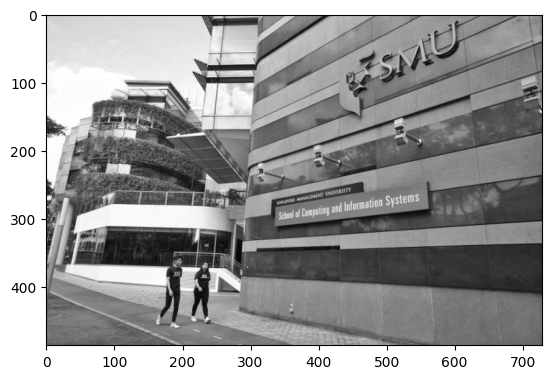

In [2]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

img = io.imread('./scis1.jpeg')
img = rgb2gray(img)

plt.imshow(img, cmap='gray')
plt.show()

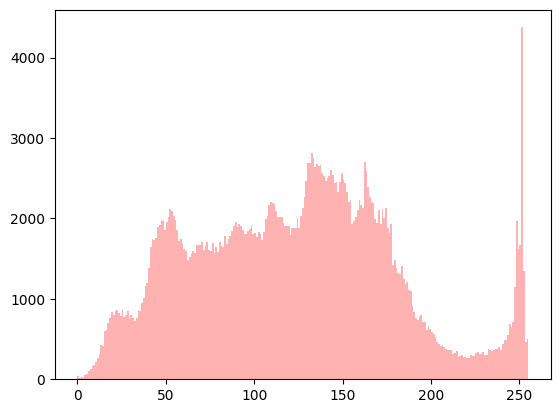

In [3]:
import matplotlib.pyplot as plt
from skimage import io

scis1 = io.imread('./scis1.jpeg')

plt.hist(scis1[:,:,0].ravel(), 255, color='r', alpha=0.3)
#plt.hist(scis1[:,:,1].ravel(), 255, color='g', alpha=0.3)
#plt.hist(scis1[:,:,2].ravel(), 255, color='b', alpha=0.3)
plt.show()

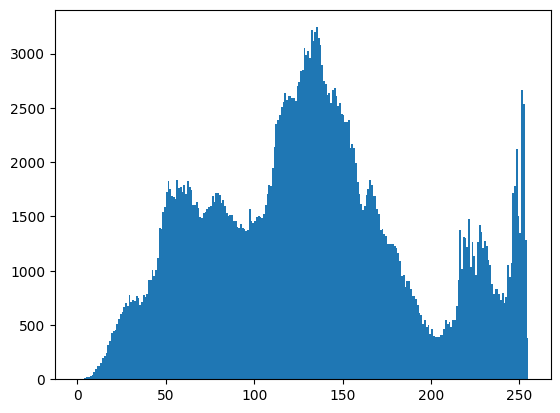

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray

gray = rgb2gray(scis1)
gray = (gray * 255).astype(np.uint8)

plt.hist(gray.ravel(), 255)
plt.show()

# Linear Filtering

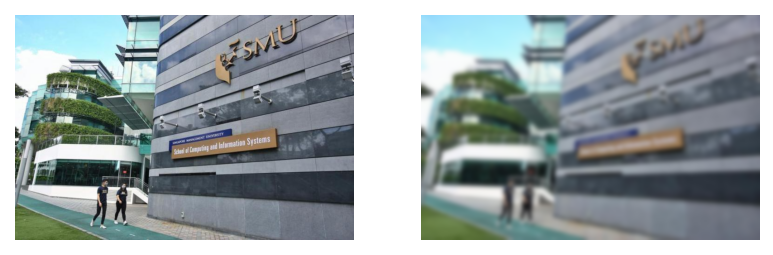

In [7]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

a1 = np.array(scis1)
a2 = gaussian_filter(a1, sigma=(5, 5, 0))

fig, axs = plt.subplots(1, 2)
fig.set_dpi(150)
axs[0].imshow(a1)
axs[1].imshow(a2)
axs[0].axis('off')
axs[1].axis('off')
plt.show()

# Edge Detection

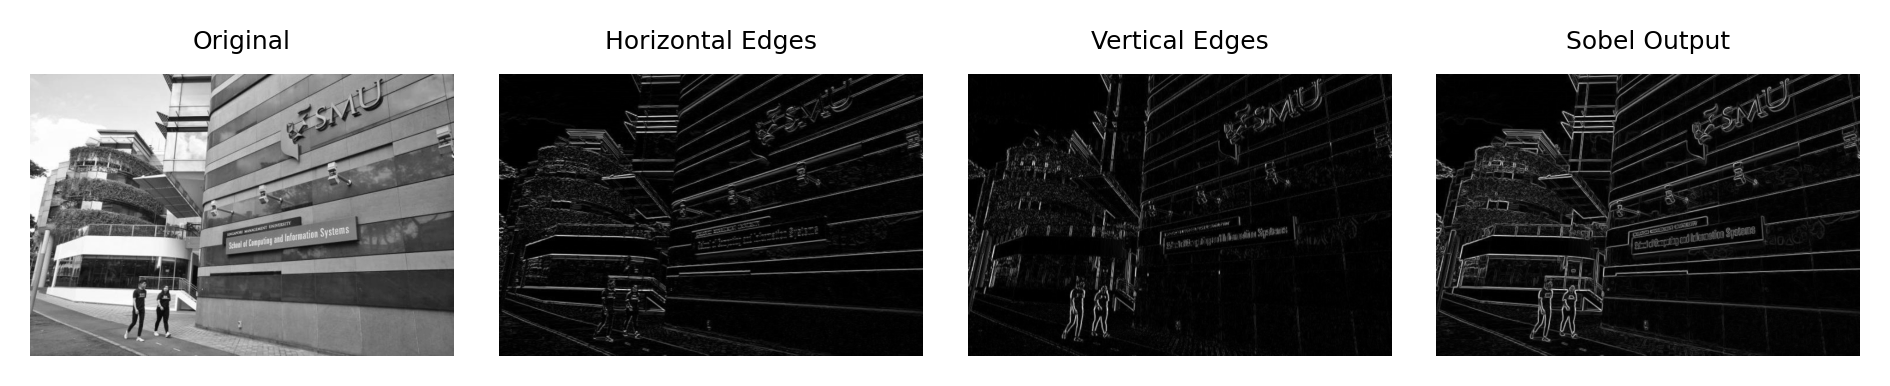

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io
from skimage.color import rgb2gray

scis1 = io.imread('./scis1.jpeg')
gray = rgb2gray(scis1) / 255

hsobel = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
vsobel = hsobel.T

horizontal = ndi.convolve(gray, hsobel)
vertical = ndi.convolve(gray, vsobel)

sobel_result = np.hypot(horizontal, vertical)

fig, axs = plt.subplots(1, 4)
fig.set_dpi(300)

axs[0].imshow(gray, cmap='gray')
axs[1].imshow(np.abs(horizontal), cmap='gray')
axs[2].imshow(np.abs(vertical), cmap='gray')
axs[3].imshow(sobel_result, cmap='gray')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')

axs[0].set_title('Original', fontsize=6, verticalalignment='baseline')
axs[1].set_title('Horizontal Edges',  fontsize=6)
axs[2].set_title('Vertical Edges', fontsize=6)
axs[3].set_title('Sobel Output', fontsize=6)
fig.tight_layout()
plt.show()

# Harris Corner Detector

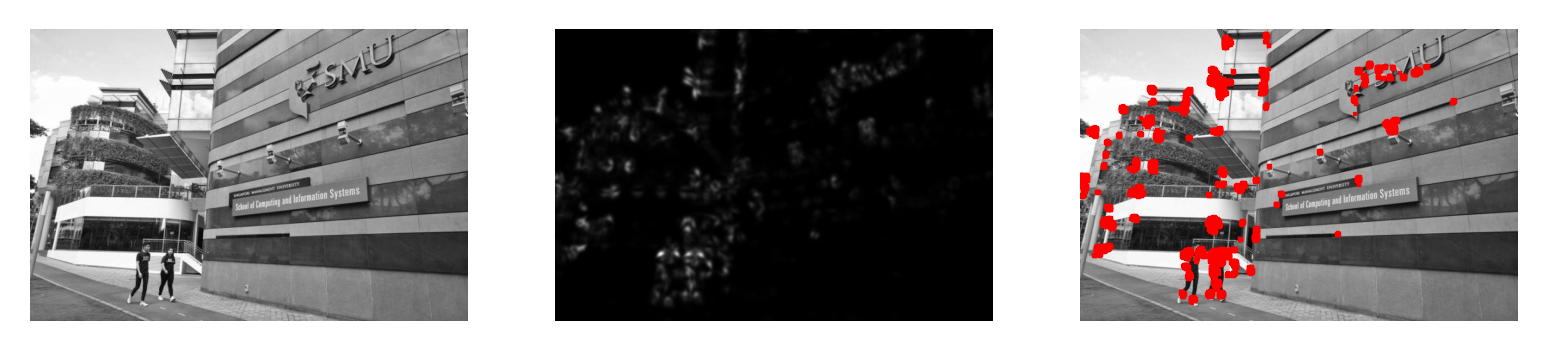

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import ndimage as ndi


img = io.imread('./scis1.jpeg')
img = rgb2gray(img)
sigma = 3
imx = ndi.gaussian_filter(img, sigma, (0, 1))
imy = ndi.gaussian_filter(img, sigma, (1, 0))

Ix2 = ndi.gaussian_filter(imx * imx, sigma)
Iy2 = ndi.gaussian_filter(imy * imy, sigma)
Ixy = ndi.gaussian_filter(imx * imy, sigma)

Mbar_det = Ix2 * Iy2 - Ixy**2
Mbar_tr = Ix2 + Iy2
Harris = Mbar_det / Mbar_tr

Harris_coordinates = np.argwhere(Harris > 0.0002)
fig, axs = plt.subplots(1, 3)
fig.set_dpi(300)

axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].imshow(Harris, cmap=plt.cm.gray)
axs[2].imshow(img, cmap=plt.cm.gray)
axs[2].plot(Harris_coordinates[:,1], Harris_coordinates[:,0], '+r', markersize=1)


axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

plt.show()